<a href="https://colab.research.google.com/github/pramod1997/submission_data_sciece/blob/master/VINTAGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# this notebook attempts to do vintage analysis on the data given by referring examples on internet
# first part of the notebook focuses on doing vintage analysis on entire loan data
# second part focuses on analysis on data which have loan data which have dpd > 30 in any month of payment
# vintage here is based on 'contract_date'
# since there is less understanding of finanicial terms and very less misisg values 
# the misisng values are taken care by pandas

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
contract_df = pd.read_csv('contract_file.csv')

In [4]:
contract_df.head()

,Unnamed: 0,CL.Contract..CL.Contract.ID,Status,Contract.Date,Oldest.Unpaid..Due.Date,Next.Due.Date,Last.Payment.Date
0,1,LAI-00002342,Active - Good Standing,2018-02-02,2018-09-01,2018-10-01,2018-08-01
1,2,LAI-00001370,Active - Bad Standing,2017-09-05,2018-06-01,2018-10-01,2018-07-16
2,3,LAI-00000042,Active - Good Standing,2016-10-25,2018-09-01,2018-10-01,2018-08-01
3,4,LAI-00001274,Active - Good Standing,2017-07-29,2018-09-01,2018-10-01,2018-08-01
4,5,LAI-00002345,Active - Bad Standing,2018-02-02,2018-07-01,2018-10-01,2018-07-31


In [0]:
payment_df = pd.read_csv('payment_history.csv')

In [6]:
payment_df.head()

,Unnamed: 0,Loan.ID,DPD,DPAmount,Mth,number
0,1,LAI-00000029,0.0,0.0,2017-02-01,1
1,2,LAI-00000030,0.0,0.0,2017-02-01,1
2,3,LAI-00000030,0.0,0.0,2017-03-01,2
3,4,LAI-00000030,0.0,0.0,2017-04-01,3
4,5,LAI-00000030,0.0,0.0,2017-05-01,4


In [0]:
### rename columns
contract_df.columns = ['index' , 'loan_id','status','contract_date','oldest_unpaid_due_date','next_due_date',
                      'last_payment_date']

payment_df.columns = ['index', 'loan_id', 'dpd', 'dp_amount', 'mth', 'number']

In [0]:
contract_df['contract_date'] = pd.to_datetime(contract_df['contract_date'])
# changing the data type of contract_date ---> to treat each unique value as vintage (monthly)

In [9]:
contract_df['CohortGroup'] = contract_df.groupby(level=0)['contract_date'].min().apply(lambda x: x.strftime('%Y-%m'))
contract_df.reset_index(inplace=True)
contract_df.head()

,level_0,index,loan_id,status,contract_date,oldest_unpaid_due_date,next_due_date,last_payment_date,CohortGroup
0,0,1,LAI-00002342,Active - Good Standing,2018-02-02,2018-09-01,2018-10-01,2018-08-01,2018-02
1,1,2,LAI-00001370,Active - Bad Standing,2017-09-05,2018-06-01,2018-10-01,2018-07-16,2017-09
2,2,3,LAI-00000042,Active - Good Standing,2016-10-25,2018-09-01,2018-10-01,2018-08-01,2016-10
3,3,4,LAI-00001274,Active - Good Standing,2017-07-29,2018-09-01,2018-10-01,2018-08-01,2017-07
4,4,5,LAI-00002345,Active - Bad Standing,2018-02-02,2018-07-01,2018-10-01,2018-07-31,2018-02


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


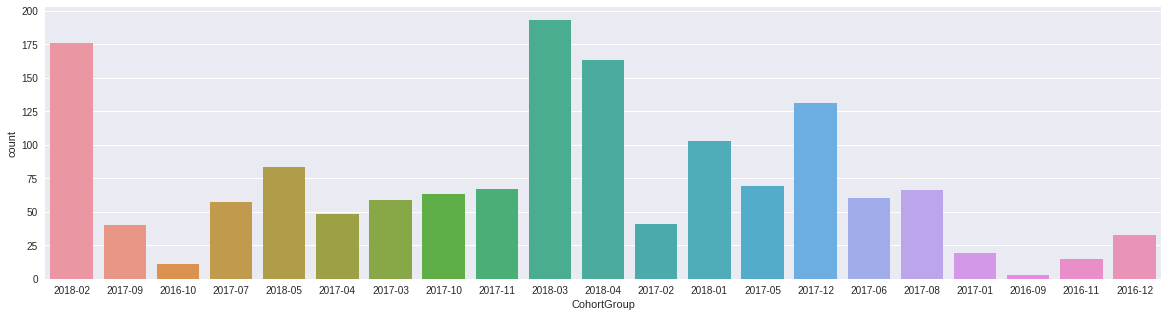

In [10]:


plt.figure(figsize = (20,5))
sns.countplot(contract_df['CohortGroup'])

In [0]:
# part - I analysis on whole data

In [0]:
### drop index of both tabes
contract_df.drop('index', axis =1 , inplace = True)
payment_df.drop('index', axis = 1, inplace = True)

In [0]:
## merging the two tables ---> 
df = pd.merge(contract_df , payment_df , how = 'inner' , on = 'loan_id')

In [14]:
df.head()

,level_0,loan_id,status,contract_date,oldest_unpaid_due_date,next_due_date,last_payment_date,CohortGroup,dpd,dp_amount,mth,number
0,0,LAI-00002342,Active - Good Standing,2018-02-02,2018-09-01,2018-10-01,2018-08-01,2018-02,NaN,0.0,2018-02-01,1
1,0,LAI-00002342,Active - Good Standing,2018-02-02,2018-09-01,2018-10-01,2018-08-01,2018-02,0.0,0.0,2018-03-01,2
2,0,LAI-00002342,Active - Good Standing,2018-02-02,2018-09-01,2018-10-01,2018-08-01,2018-02,0.0,0.0,2018-04-01,3
3,0,LAI-00002342,Active - Good Standing,2018-02-02,2018-09-01,2018-10-01,2018-08-01,2018-02,0.0,0.0,2018-05-01,4
4,0,LAI-00002342,Active - Good Standing,2018-02-02,2018-09-01,2018-10-01,2018-08-01,2018-02,0.0,0.0,2018-06-01,5


In [15]:
grouped = df.groupby(['CohortGroup', 'mth'])

# count the unique loan_id,  and total dpp per emi month . 
cohorts = grouped.agg({'loan_id': pd.Series.nunique,
                       
                       'dp_amount': np.sum})

# changing column name
cohorts.rename(columns={'loan_id': 'no_of_loans'}, inplace=True)
cohorts.head(20)

no_of_loans  dp_amount
CohortGroup mth                               
2016-09     2017-02-01            3        0.0
            2017-03-01            2        0.0
            2017-04-01            2        0.0
            2017-05-01            2        0.0
            2017-06-01            2        0.0
            2017-07-01            2        0.0
            2017-08-01            2        0.0
            2017-09-01            2     5192.0
            2017-10-01            2     5191.0
            2017-11-01            2     5191.0
            2017-12-01            2    10381.0
            2018-01-01            2    10382.0
            2018-02-01            2    10573.0
            2018-03-01            2    20956.0
            2018-04-01            2    20956.0
            2018-05-01            2    20956.0
            2018-06-01            2    26148.0
2016-10     2017-02-01           11        0.0
            2017-03-01           10        0.0
            2017-04-01           10        0.0

In [16]:
### labelling emi months as cohort period
def cohort_period(df):
    
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

no_of_loans  dp_amount  CohortPeriod
CohortGroup mth                                             
2016-09     2017-02-01            3        0.0             1
            2017-03-01            2        0.0             2
            2017-04-01            2        0.0             3
            2017-05-01            2        0.0             4
            2017-06-01            2        0.0             5

In [17]:
### now we find the sum  due payment per emi period as 
##  actual principle amount is missing so cant calculate loss in collection in each month 
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

#Series holding the total size of each CohortGroup
cohort_group_size = cohorts['no_of_loans'].groupby(level=0).first()
cohort_group_size


CohortGroup
2016-09      3
2016-10     11
2016-11     15
2016-12     33
2017-01     19
2017-02     41
2017-03     59
2017-04     46
2017-05     69
2017-06     60
2017-07     57
2017-08     65
2017-09     40
2017-10     63
2017-11     66
2017-12    131
2018-01    102
2018-02    173
2018-03    191
2018-04    161
2018-05     79
Name: no_of_loans, dtype: int64

In [18]:
cohorts['no_of_loans'].unstack(0)  ### gives idea how many loans were to pay payment in that particular 
## month having same vintage month

CohortGroup,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
CohortPeriod,,,,,,,,,,,,,,,,,,,,,
1,3.0,11.0,15.0,33.0,19.0,41.0,59.0,46.0,69.0,60.0,...,65.0,40.0,63.0,66.0,131.0,102.0,173.0,191.0,161.0,79.0
2,2.0,10.0,15.0,32.0,19.0,41.0,59.0,46.0,66.0,60.0,...,65.0,40.0,62.0,66.0,130.0,101.0,173.0,189.0,161.0,79.0
3,2.0,10.0,15.0,32.0,19.0,41.0,59.0,46.0,65.0,60.0,...,63.0,39.0,62.0,66.0,130.0,101.0,173.0,188.0,160.0,NaN
4,2.0,10.0,15.0,31.0,19.0,41.0,59.0,46.0,65.0,60.0,...,63.0,39.0,61.0,66.0,130.0,98.0,172.0,186.0,NaN,NaN
5,2.0,10.0,15.0,31.0,19.0,39.0,57.0,46.0,62.0,60.0,...,62.0,39.0,61.0,65.0,129.0,98.0,169.0,NaN,NaN,NaN
6,2.0,10.0,15.0,30.0,18.0,39.0,57.0,44.0,62.0,58.0,...,62.0,38.0,61.0,64.0,128.0,97.0,NaN,NaN,NaN,NaN
7,2.0,9.0,15.0,29.0,18.0,38.0,57.0,43.0,62.0,58.0,...,61.0,38.0,59.0,64.0,128.0,NaN,NaN,NaN,NaN,NaN
8,2.0,9.0,15.0,29.0,18.0,36.0,57.0,42.0,62.0,58.0,...,61.0,38.0,58.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN
9,2.0,9.0,15.0,29.0,18.0,35.0,57.0,42.0,62.0,58.0,...,59.0,38.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
total_due_payment = cohorts['dp_amount'].unstack(0)   ### now instead of no of loans
### we calculate total due money in that emi month from all loans having same vintage 
total_due_payment

CohortGroup,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
CohortPeriod,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,9922.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,16452.0,7722.0,18719.0,0.0,12233.00,10766.00,26605.0,8622.0,...,4877.0,14562.0,20897.0,38011.0,29743.0,30104.0,29995.0,26708.0,32803.0,44498.0
3,0.0,0.0,7589.0,17714.0,8719.0,3650.0,51760.00,41558.08,25385.0,13347.0,...,63685.0,40577.0,88995.0,22414.0,105656.0,86299.0,62955.0,134308.0,108040.0,NaN
4,0.0,3870.0,54182.0,23660.0,27438.0,23009.0,109459.00,26944.00,57635.0,39783.0,...,58149.0,86760.0,69282.0,41368.0,255514.0,121485.0,150342.0,169512.0,NaN,NaN
5,0.0,0.0,60308.0,13580.0,29984.0,48535.0,127342.00,91517.00,71542.0,44443.0,...,96490.0,67758.0,93608.0,79550.0,240388.0,160109.0,199459.0,NaN,NaN,NaN
6,0.0,0.0,111773.0,29852.0,69739.0,50870.0,163507.00,160787.00,71206.0,112181.0,...,90041.0,101447.0,223277.0,87146.0,344725.0,190221.0,NaN,NaN,NaN,NaN
7,0.0,8152.0,131967.0,31359.0,76549.0,83058.0,221718.00,98536.00,113169.0,92464.0,...,106111.0,163029.0,232935.0,110624.0,410514.0,NaN,NaN,NaN,NaN,NaN
8,5192.0,3871.0,189166.0,59662.0,68598.0,112340.0,253361.00,177452.00,125321.0,98262.0,...,133790.0,153217.0,291720.0,154931.0,NaN,NaN,NaN,NaN,NaN,NaN
9,5191.0,3871.0,208791.0,72838.0,118228.0,131727.0,384596.00,173925.00,161292.0,161767.0,...,156277.0,188723.0,337906.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
labels = df['CohortGroup'].unique()      
#labels = df['CohortGroup'].unique()[:5]

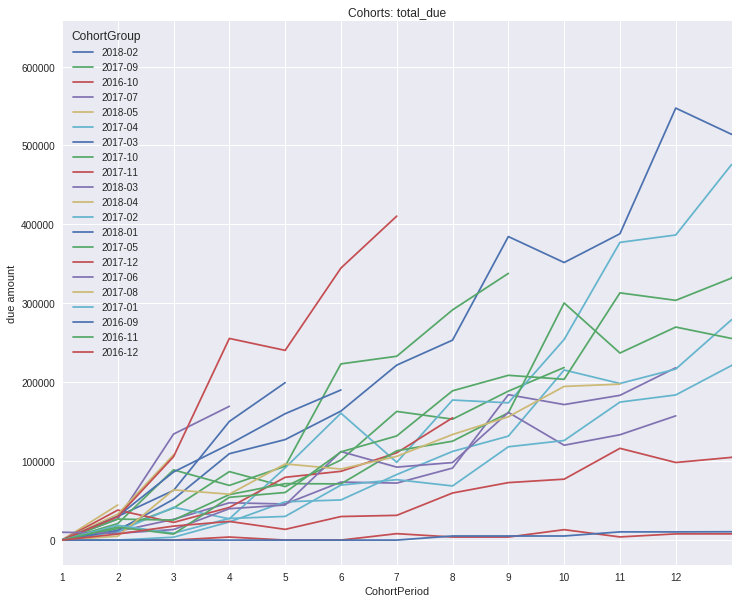

In [21]:
total_due_payment[labels].plot(figsize=(12,10))
plt.title('Cohorts: total_due')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 13)
plt.ylabel('due amount');

In [0]:
################################### Part -2 consider loans who have 30 + dpd  ################# 

In [0]:
########  new dataframe ---> select unique loan id  who have 30 + dpd 

In [24]:
loan_id_to_consider = (df['loan_id'][df['dpd']>30]).unique()
len(loan_id_to_consider)   ### those loan_id  which have dpd of 30 or more 

226

In [0]:
new_df = df[df['loan_id'].isin(loan_id_to_consider)]

In [26]:
new_df.head()

,level_0,loan_id,status,contract_date,oldest_unpaid_due_date,next_due_date,last_payment_date,CohortGroup,dpd,dp_amount,mth,number
5,1,LAI-00001370,Active - Bad Standing,2017-09-05,2018-06-01,2018-10-01,2018-07-16,2017-09,NaN,0.0,2017-09-01,1
6,1,LAI-00001370,Active - Bad Standing,2017-09-05,2018-06-01,2018-10-01,2018-07-16,2017-09,0.0,0.0,2017-10-01,2
7,1,LAI-00001370,Active - Bad Standing,2017-09-05,2018-06-01,2018-10-01,2018-07-16,2017-09,0.0,0.0,2017-11-01,3
8,1,LAI-00001370,Active - Bad Standing,2017-09-05,2018-06-01,2018-10-01,2018-07-16,2017-09,0.0,0.0,2017-12-01,4
9,1,LAI-00001370,Active - Bad Standing,2017-09-05,2018-06-01,2018-10-01,2018-07-16,2017-09,0.0,0.0,2018-01-01,5


In [0]:
### following the same process as it is done in part - I 

In [28]:
grouped = new_df.groupby(['CohortGroup', 'mth'])

# count the unique loan_id,  and total dpp per emi month ----> meaning out of all loans who made payment 
cohorts = grouped.agg({'loan_id': pd.Series.nunique,
                       
                       'dp_amount': np.sum})

# make the column names more meaningful
cohorts.rename(columns={'loan_id': 'no_of_loans'}, inplace=True)
cohorts

no_of_loans  dp_amount
CohortGroup mth                               
2016-09     2017-02-01            1        0.0
            2017-03-01            1        0.0
            2017-04-01            1        0.0
            2017-05-01            1        0.0
            2017-06-01            1        0.0
            2017-07-01            1        0.0
            2017-08-01            1        0.0
            2017-09-01            1     5192.0
            2017-10-01            1     5191.0
            2017-11-01            1     5191.0
            2017-12-01            1    10381.0
            2018-01-01            1    10382.0
            2018-02-01            1    10573.0
            2018-03-01            1    20956.0
            2018-04-01            1    20956.0
            2018-05-01            1    20956.0
            2018-06-01            1    26148.0
2016-10     2017-02-01            1        0.0
            2017-03-01            1        0.0
            2017-04-01            1        0.0
            2017-05-01            1     3870.0
            2017-06-01            1        0.0
            2017-07-01            1        0.0
            2017-08-01            1     3871.0
            2017-09-01            1     3871.0
            2017-10-01            1     3871.0
            2017-11-01            1     3871.0
            2017-12-01            1        0.0
            2018-01-01            1     3871.0
            2018-02-01            1     3870.0
...                             ...        ...
2017-11     2018-02-01           10    19776.0
            2018-03-01           10    79550.0
            2018-04-01           10    68625.0
            2018-05-01           10    84790.0
            2018-06-01           10   116515.0
2017-12     2017-12-01           30        0.0
            2018-01-01           30    20077.0
            2018-02-01           30    77487.0
            2018-03-01           30   241523.0
            2018-04-01           30   232036.0
            2018-05-01           30   308547.0
            2018-06-01           30   341384.0
2018-01     2018-01-01           10        0.0
            2018-02-01           10    12552.0
            2018-03-01           10    64252.0
            2018-04-01           10    80224.0
            2018-05-01           10    99468.0
            2018-06-01           10   117126.0
2018-02     2018-02-01           11        0.0
            2018-03-01           11    12014.0
            2018-04-01           11    29867.0
            2018-05-01           11    67946.0
            2018-06-01           11    85727.0
2018-03     2018-03-01           10        0.0
            2018-04-01           10    15593.0
            2018-05-01           10    41449.0
            2018-06-01           10    65887.0
2018-04     2018-04-01            1        0.0
            2018-05-01            1     4738.0
            2018-06-01            1      957.0

[230 rows x 2 columns]

In [29]:
### labelling emi months cohort period
def cohort_period(new_df):
    
    new_df['CohortPeriod'] = np.arange(len(new_df)) + 1
    return new_df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts

no_of_loans  dp_amount  CohortPeriod
CohortGroup mth                                             
2016-09     2017-02-01            1        0.0             1
            2017-03-01            1        0.0             2
            2017-04-01            1        0.0             3
            2017-05-01            1        0.0             4
            2017-06-01            1        0.0             5
            2017-07-01            1        0.0             6
            2017-08-01            1        0.0             7
            2017-09-01            1     5192.0             8
            2017-10-01            1     5191.0             9
            2017-11-01            1     5191.0            10
            2017-12-01            1    10381.0            11
            2018-01-01            1    10382.0            12
            2018-02-01            1    10573.0            13
            2018-03-01            1    20956.0            14
            2018-04-01            1    20956.0            15
            2018-05-01            1    20956.0            16
            2018-06-01            1    26148.0            17
2016-10     2017-02-01            1        0.0             1
            2017-03-01            1        0.0             2
            2017-04-01            1        0.0             3
            2017-05-01            1     3870.0             4
            2017-06-01            1        0.0             5
            2017-07-01            1        0.0             6
            2017-08-01            1     3871.0             7
            2017-09-01            1     3871.0             8
            2017-10-01            1     3871.0             9
            2017-11-01            1     3871.0            10
            2017-12-01            1        0.0            11
            2018-01-01            1     3871.0            12
            2018-02-01            1     3870.0            13
...                             ...        ...           ...
2017-11     2018-02-01           10    19776.0             4
            2018-03-01           10    79550.0             5
            2018-04-01           10    68625.0             6
            2018-05-01           10    84790.0             7
            2018-06-01           10   116515.0             8
2017-12     2017-12-01           30        0.0             1
            2018-01-01           30    20077.0             2
            2018-02-01           30    77487.0             3
            2018-03-01           30   241523.0             4
            2018-04-01           30   232036.0             5
            2018-05-01           30   308547.0             6
            2018-06-01           30   341384.0             7
2018-01     2018-01-01           10        0.0             1
            2018-02-01           10    12552.0             2
            2018-03-01           10    64252.0             3
            2018-04-01           10    80224.0             4
            2018-05-01           10    99468.0             5
            2018-06-01           10   117126.0             6
2018-02     2018-02-01           11        0.0             1
            2018-03-01           11    12014.0             2
            2018-04-01           11    29867.0             3
            2018-05-01           11    67946.0             4
            2018-06-01           11    85727.0             5
2018-03     2018-03-01           10        0.0             1
            2018-04-01           10    15593.0             2
            2018-05-01           10    41449.0             3
            2018-06-01           10    65887.0             4
2018-04     2018-04-01            1        0.0             1
            2018-05-01            1     4738.0             2
            2018-06-01            1      957.0             3

[230 rows x 3 columns]

In [30]:
### now we find the  due payment per emi period as 
# actual principle amount is missing so cant calculate loss in collection 
## in each month 
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

#  Series holding the total size of each CohortGroup
cohort_group_size = cohorts['no_of_loans'].groupby(level=0).first()
cohort_group_size


CohortGroup
2016-09     1
2016-10     1
2016-11     8
2016-12    10
2017-01     7
2017-02    14
2017-03    21
2017-04     9
2017-05    17
2017-06    14
2017-07    16
2017-08    12
2017-09     8
2017-10    16
2017-11    10
2017-12    30
2018-01    10
2018-02    11
2018-03    10
2018-04     1
Name: no_of_loans, dtype: int64

In [31]:
cohorts['no_of_loans'].unstack(0).head()  ## the values in the table indicate no of loans which were scheduled to pay emi that period

CohortGroup,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
CohortPeriod,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,8.0,10.0,7.0,14.0,21.0,9.0,17.0,14.0,16.0,12.0,8.0,16.0,10.0,30.0,10.0,11.0,10.0,1.0
2,1.0,1.0,8.0,10.0,7.0,14.0,21.0,9.0,17.0,14.0,16.0,12.0,8.0,16.0,10.0,30.0,10.0,11.0,10.0,1.0
3,1.0,1.0,8.0,10.0,7.0,14.0,21.0,9.0,17.0,14.0,16.0,12.0,8.0,16.0,10.0,30.0,10.0,11.0,10.0,1.0
4,1.0,1.0,8.0,10.0,7.0,14.0,21.0,9.0,17.0,14.0,16.0,12.0,8.0,16.0,10.0,30.0,10.0,11.0,10.0,NaN
5,1.0,1.0,8.0,10.0,7.0,14.0,21.0,9.0,17.0,14.0,16.0,12.0,8.0,16.0,10.0,30.0,10.0,11.0,NaN,NaN


In [32]:
total_due_payment = cohorts['dp_amount'].unstack(0)
total_due_payment.head()

CohortGroup,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
CohortPeriod,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,12182.0,3795.0,18719.0,0.0,8852.0,10766.00,16923.0,0.0,6123.0,4877.0,3784.0,14553.0,19894.0,20077.0,12552.0,12014.0,15593.0,4738.0
3,0.0,0.0,7589.0,3795.0,8719.0,3650.0,43379.0,10768.08,25385.0,10567.0,12662.0,39282.0,27547.0,70145.0,15928.0,77487.0,64252.0,29867.0,41449.0,957.0
4,0.0,3870.0,54182.0,10086.0,27438.0,15304.0,101078.0,17369.00,48737.0,17523.0,31797.0,28045.0,81805.0,61699.0,19776.0,241523.0,80224.0,67946.0,65887.0,NaN
5,0.0,0.0,60308.0,3795.0,23498.0,41632.0,112119.0,60495.00,66378.0,44443.0,30491.0,90287.0,60313.0,93608.0,79550.0,232036.0,99468.0,85727.0,NaN,NaN


In [0]:
labels = new_df['CohortGroup'].unique()
#labels = new_df['CohortGroup'].unique()[:5]

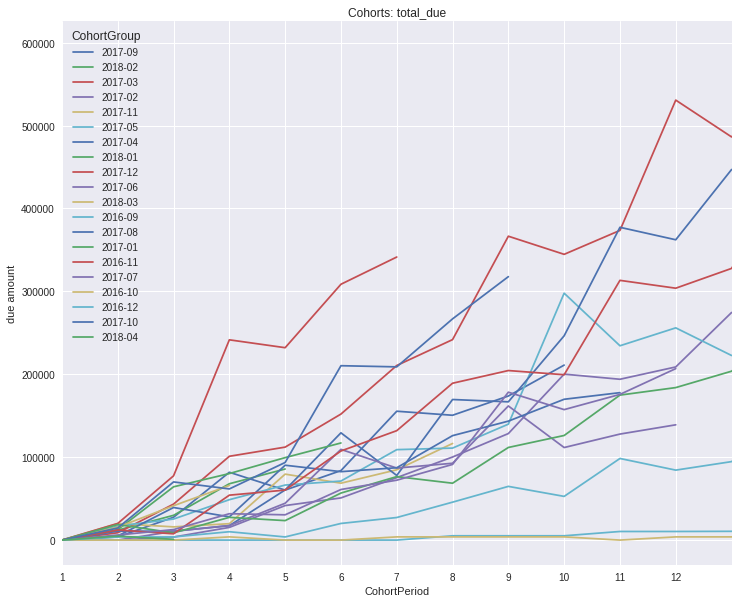

In [34]:
total_due_payment[labels].plot(figsize=(12,10))
plt.title('Cohorts: total_due')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 13)
plt.ylabel('due amount');